In [1]:
# for string matching
import re 

# for reading data
import pandas as pd

# for handling html data
from bs4 import BeautifulSoup

# for visualization
import matplotlib.pyplot as plt  

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv('train_2kmZucJ.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [4]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [3]:
df.shape

(7920, 3)

In [4]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [5]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [6]:
df.loc[4]['tweet']

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [7]:
df.loc[26]['tweet']

"$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple"

In [8]:
def replace_censored(s):
    return s.replace('$&@*#', 'censored')

In [9]:
df['tweet'] = df['tweet'].apply(replace_censored)

In [10]:
df.loc[26]['tweet']

"censored my ipod is all messed up and i haven't done nothing to it #censored #MyLoss ! #Apple"

In [11]:
def cleaner(text):

  # take off html tags
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
  
  # fetch alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
    text = text.lower()

  # split text into tokens to remove whitespaces
    tokens = text.split()

    return " ".join(tokens)

In [12]:
df['cleaned_tweet'] = df['tweet'].apply(cleaner)

In [13]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
df.loc[0]['cleaned_tweet']

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [15]:
df.loc[1]['tweet']

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [16]:
df.loc[1]['cleaned_tweet']

'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias'

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [23]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_stopwords)

In [25]:
df['len'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

In [26]:
df.head()

,id,label,tweet,cleaned_tweet,len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,12
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,10
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love would go talk makememories unplug relax iphone smartphone wifi connect,11
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george made way iphone cute daventry home,9
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amazing service apple even talk question unless pay stupid support,10


In [27]:
df['len'].max()

39

(array([  32., 1404., 4027., 1613.,  255.,  147.,  149.,  189.,   85.,
          19.]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <BarContainer object of 10 artists>)

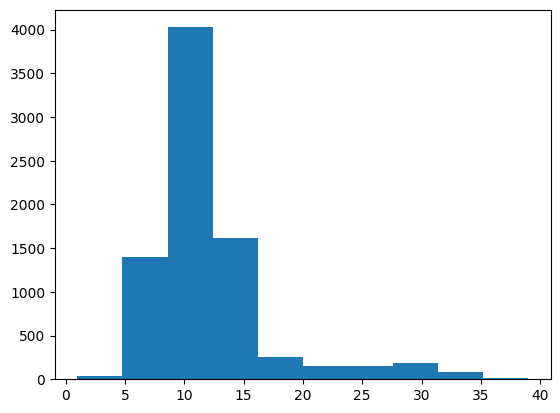

In [28]:
plt.hist(x=df['len'].values)

In [29]:
for i in range(0, 100, 10):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

0th percentile is 1.0
10th percentile is 8.0
20th percentile is 9.0
30th percentile is 9.0
40th percentile is 10.0
50th percentile is 11.0
60th percentile is 12.0
70th percentile is 13.0
80th percentile is 14.0
90th percentile is 17.0


In [30]:
for i in range(91, 101, 1):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

91th percentile is 18.0
92th percentile is 19.0
93th percentile is 20.0
94th percentile is 22.0
95th percentile is 25.0
96th percentile is 27.0
97th percentile is 29.0
98th percentile is 30.0
99th percentile is 32.0
100th percentile is 39.0


In [31]:
X = df['cleaned_tweet']
y = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

In [33]:
x_tr.head()

862                                                good birthday purchase happy applewatch spacegray applewatchsport sport apple
6249                      iphone screwed hung update seems hung restoring iphone software apple ihateapple macssuck good measure
2761    sunset one minute ago samsung europe zeeland brouwersdam stormhour earthandclouds mooieluchten pic twitter com ad ycobxh
7496                                     yeah bb sucks iphone rt nstre love since bb yet send images without single issue f k bb
2141                                                                                       iphone seriously go hour iphone apple
Name: cleaned_tweet, dtype: object

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

#prepare a tokenizer
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(x_tr)

In [35]:
x_tokenizer.word_index

{'iphone': 1,
 'apple': 2,
 'samsung': 3,
 'new': 4,
 'twitter': 5,
 'com': 6,
 'phone': 7,
 'sony': 8,
 'follow': 9,
 'pic': 10,
 'ipad': 11,
 'like': 12,
 'love': 13,
 'ios': 14,
 'android': 15,
 'life': 16,
 'rt': 17,
 'day': 18,
 'instagram': 19,
 'censored': 20,
 'photo': 21,
 'gain': 22,
 'cute': 23,
 'get': 24,
 'today': 25,
 'got': 26,
 'galaxy': 27,
 'back': 28,
 'photography': 29,
 'case': 30,
 'fun': 31,
 'news': 32,
 'music': 33,
 'instagood': 34,
 'app': 35,
 'time': 36,
 'happy': 37,
 'beautiful': 38,
 'fashion': 39,
 'funny': 40,
 'lol': 41,
 'smile': 42,
 'tech': 43,
 'itunes': 44,
 'one': 45,
 'ps': 46,
 'birthday': 47,
 'iphonex': 48,
 'work': 49,
 'ipod': 50,
 'good': 51,
 'finally': 52,
 'everyone': 53,
 'photooftheday': 54,
 'amazing': 55,
 'girl': 56,
 'update': 57,
 'make': 58,
 'selfie': 59,
 'apps': 60,
 'must': 61,
 'followers': 62,
 'sougofollow': 63,
 'mac': 64,
 'note': 65,
 'thanks': 66,
 'free': 67,
 'u': 68,
 'fail': 69,
 'rts': 70,
 'friends': 71,
 'wou

In [36]:
len(x_tokenizer.word_index)

15161

In [37]:
# maximum sequence length allowed
max_len = 17

#convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr_seq = pad_sequences(x_tr_seq,  padding='post', maxlen=max_len)
x_val_seq = pad_sequences(x_val_seq, padding='post', maxlen=max_len)

In [38]:
#no. of unique words
x_voc_size = len(x_tokenizer.word_index) + 1
x_voc_size

15162

In [39]:
x_tr_seq[0]

array([  51,   47,  634,   37,  487, 2029, 3340, 1063,    2,    0,    0,
          0,    0,    0,    0,    0,    0])

In [40]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

In [41]:
import tensorflow as tf

In [42]:
def f1_score_weighted(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred = tf.round(y_pred)

    # Calculate precision and recall
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate F1 score
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    # Calculate weighted F1 score
    weights = K.sum(y_true, axis=0)
    weighted_f1 = K.sum(weights * f1) / K.sum(weights + K.epsilon())

    return weighted_f1


In [59]:
#sequential model
model = Sequential()

#embedding layer
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

#rnn layer
model.add(GRU(12,activation='relu'))

#dense layer
model.add(Dense(6,activation='relu')) 

#output layer
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 17, 50)            758100    
                                                                 
 gru (GRU)                   (None, 12)                2304      
                                                                 
 dense_8 (Dense)             (None, 6)                 78        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 760,489
Trainable params: 760,489
Non-trainable params: 0
_________________________________________________________________


In [61]:
#define optimizer and loss
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[f1_score_weighted])

In [62]:
#train the model 
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=10, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/10
50/50 [==============================] - 5s 42ms/step - loss: 0.6414 - f1_score_weighted: 0.0107 - val_loss: 0.5415 - val_f1_score_weighted: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 2s 33ms/step - loss: 0.3989 - f1_score_weighted: 0.2295 - val_loss: 0.3353 - val_f1_score_weighted: 0.6150
Epoch 3/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2339 - f1_score_weighted: 0.8254 - val_loss: 0.2973 - val_f1_score_weighted: 0.7320
Epoch 4/10
50/50 [==============================] - 2s 35ms/step - loss: 0.1370 - f1_score_weighted: 0.9214 - val_loss: 0.3090 - val_f1_score_weighted: 0.7804
Epoch 5/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0828 - f1_score_weighted: 0.9474 - val_loss: 0.3374 - val_f1_score_weighted: 0.7733
Epoch 6/10
50/50 [==============================] - 2s 32ms/step - loss: 0.0584 - f1_score_weighted: 0.9669 - val_loss: 0.4106 - val_f1_score_weighted: 0.7481
Epoch 7/10
50/50 [========================